## Observations and Insights


1. There is a strong positive correlation between average tumor volume and weight in Capomulin group, 
    the correlation coefficient is 0.84.
2. Capomulin and Ramicane group have lower average tumor volumes compared to Infubinol and Ceftamin 
    at end of experiment.
3. Tumor volume decrease over time in mouse s185 which treated with Capomulin.
4. Almost equal numbers of male and female mice are included in the experiments. 




## Dependencies and starter code

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_df=pd.merge(mouse_metadata,study_results, how='left', on='Mouse ID')
combined_df=combined_df.dropna()
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
combined_groupby_df=combined_df.groupby(['Drug Regimen'])
TV_meanByDrg=combined_groupby_df['Tumor Volume (mm3)'].mean()
TV_medianByDrg=combined_groupby_df['Tumor Volume (mm3)'].median()
TV_varByDrg=combined_groupby_df['Tumor Volume (mm3)'].var()
TV_stdByDrg=combined_groupby_df['Tumor Volume (mm3)'].std()
TV_semByDrg=combined_groupby_df['Tumor Volume (mm3)'].sem()
TV_countByDrg=combined_groupby_df['Tumor Volume (mm3)'].count()
TV_summary_df=pd.DataFrame({'Count':TV_countByDrg,'Mean TV':TV_meanByDrg,'Median TV':TV_medianByDrg,'Std TV':TV_stdByDrg,'SEM TV':TV_semByDrg,'VAR TV':TV_varByDrg})

TV_summary_df

,Count,Mean TV,Median TV,Std TV,SEM TV,VAR TV
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,4.994774,0.329346,24.947764
Ceftamin,178,52.591172,51.776157,6.268188,0.469821,39.290177
Infubinol,178,52.884795,51.820584,6.567243,0.492236,43.128684
Ketapril,188,55.235638,53.698743,8.279709,0.603860,68.553577
Naftisol,186,54.331565,52.509285,8.134708,0.596466,66.173479
Placebo,181,54.033581,52.288934,7.821003,0.581331,61.168083
Propriva,161,52.322552,50.854632,6.507770,0.512884,42.351070
Ramicane,228,40.216745,40.673236,4.846308,0.320955,23.486704
Stelasyn,181,54.233149,52.431737,7.710419,0.573111,59.450562


## Bar plots

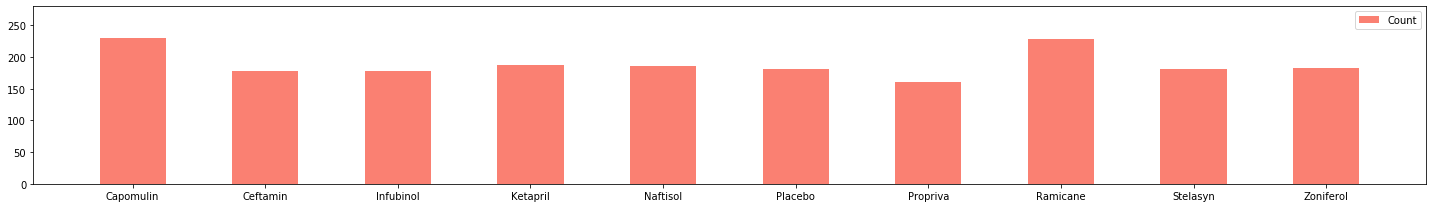

In [8]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
NumByDrg_df=TV_summary_df[['Count']].reset_index()
Num_plot=NumByDrg_df.plot(kind="bar",color='salmon', figsize=(20,3))
Num_plot.set_xticklabels(NumByDrg_df["Drug Regimen"], rotation=0)
plt.xlim(-0.75, len(NumByDrg_df['Drug Regimen'])-0.25)
plt.ylim(0, max(NumByDrg_df['Count'])+50)
plt.tight_layout()

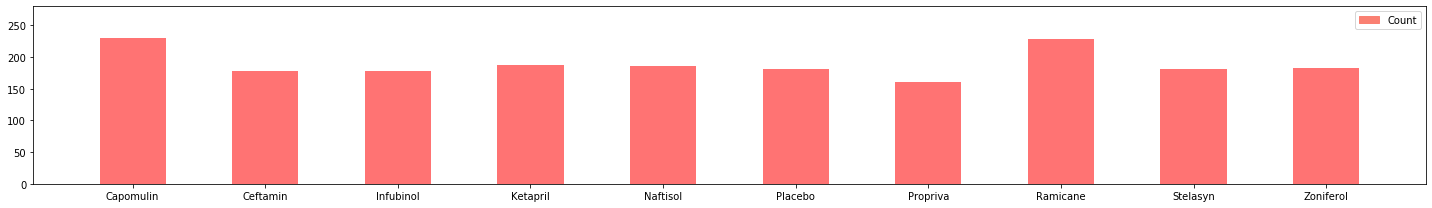

In [9]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.figure(figsize=(20,3))
plt.bar(NumByDrg_df['Drug Regimen'],NumByDrg_df['Count'],color='red',width=0.5, alpha=0.55, align="center")
plt.ylim(0, max(NumByDrg_df['Count'])+50)
plt.xlim(-0.75, len(NumByDrg_df['Drug Regimen'])-0.25)
sal_patch = mpatches.Patch(color='salmon', label='Count')
plt.legend(handles=[sal_patch])
plt.tight_layout()

## Pie plots

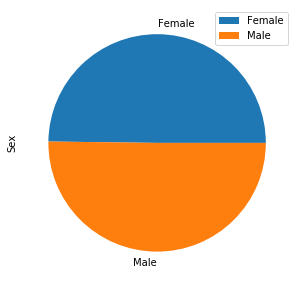

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df=mouse_metadata.groupby(['Sex'])
countByG_df=pd.DataFrame(gender_df['Sex'].count())
Gender_pie=countByG_df.plot(kind="pie",subplots=True, figsize=(5,5))

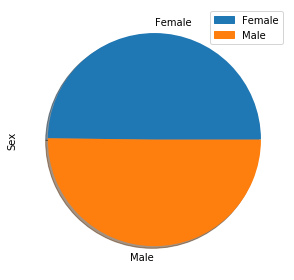

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
explode = (0, 0)
plt.figsize=(5,5)
plt.pie(countByG_df['Sex'], explode=explode, labels=['Female','Male'], 
         shadow=True, startangle=0)
plt.ylabel('Sex')
blue_patch = mpatches.Patch(color='tab:blue', label='Female')
ye_patch = mpatches.Patch(color='tab:orange', label='Male')
plt.legend(handles=[blue_patch,ye_patch,])

plt.tight_layout()


## Quartiles, outliers and boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
drug4_df=combined_df[combined_df["Drug Regimen"].isin(['Capomulin','Ramicane','Infubinol','Ceftamin'])]
drug4_df.sort_values(["Mouse ID", "Timepoint"], ascending=[True, True])

final_TV_df=drug4_df.groupby(["Mouse ID"]).last()

outlier_TV=pd.DataFrame()
for x in ['Capomulin','Ramicane','Infubinol','Ceftamin']:
    final_TV=final_TV_df.loc[final_TV_df["Drug Regimen"]==x]['Tumor Volume (mm3)']

    quartiles = final_TV.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"{x} group :")
    print(f"    Lower quartile of final TV : {lowerq}")
    print(f"    Upper quartile of final TV : {upperq}")
    print(f"    Interquartile range of final : {iqr}")
    print(f"    Median of final TV : {quartiles[0.5]} ")
    print(f"    Lower bound of final TV : {lower_bound}")
    print(f"    Upper bound of final TV :  {upper_bound} ")

    outlier_TV =outlier_TV.append( (final_TV_df.loc[(final_TV_df["Drug Regimen"]==x) & ((final_TV_df['Tumor Volume (mm3)'] < lower_bound) | (final_TV_df['Tumor Volume (mm3)'] > upper_bound))]), ignore_index=True)


outlier_TV



Capomulin group :
    Lower quartile of final TV : 32.37735684
    Upper quartile of final TV : 40.1592203
    Interquartile range of final : 7.781863460000004
    Median of final TV : 38.125164399999996 
    Lower bound of final TV : 20.70456164999999
    Upper bound of final TV :  51.83201549 
Ramicane group :
    Lower quartile of final TV : 31.56046955
    Upper quartile of final TV : 40.65900627
    Interquartile range of final : 9.098536719999998
    Median of final TV : 36.56165229 
    Lower bound of final TV : 17.912664470000003
    Upper bound of final TV :  54.30681135 
Infubinol group :
    Lower quartile of final TV : 54.04860769
    Upper quartile of final TV : 65.52574285
    Interquartile range of final : 11.477135160000003
    Median of final TV : 60.16518046 
    Lower bound of final TV : 36.83290494999999
    Upper bound of final TV :  82.74144559000001 
Ceftamin group :
    Lower quartile of final TV : 48.72207785
    Upper quartile of final TV : 64.29983003
    Int

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Infubinol,Female,18,25,5,36.321346,0


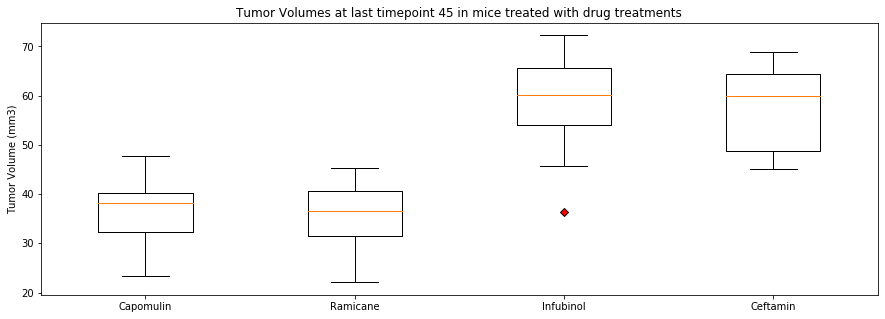

In [13]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final4_TV=[]
for x in ['Capomulin','Ramicane','Infubinol','Ceftamin']:
    final4_TV.append(final_TV_df.loc[final_TV_df["Drug Regimen"]==x]['Tumor Volume (mm3)'])

red_diamond = dict(markerfacecolor='r', marker='D')
fig1, ax1 = plt.subplots(figsize=(15,5))
ax1.set_title('Tumor Volumes at last timepoint 45 in mice treated with drug treatments')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xticklabels(['Capomulin','Ramicane','Infubinol','Ceftamin'])
ax1.boxplot(final4_TV,flierprops=red_diamond)
plt.show()



## Line and scatter plots

Text(0.5, 1.0, 'Tumor volume changes over time in mouse s185 treated with Capomulin ')

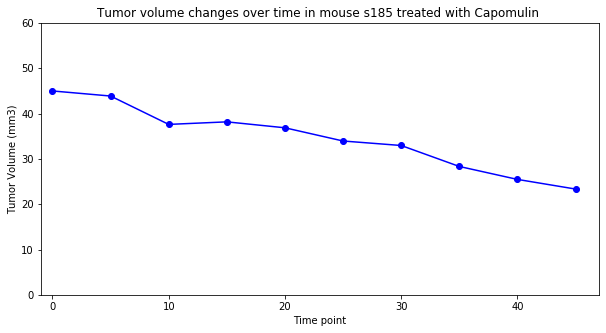

In [14]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

mouse_df=combined_df.loc[combined_df["Drug Regimen"]=="Capomulin"].head(10)

plt.figure(figsize=(10, 5))
plt.plot(mouse_df["Timepoint"], mouse_df['Tumor Volume (mm3)'], marker ='o', color='blue', )
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Time point')
plt.ylim(0, max(mouse_df['Tumor Volume (mm3)'])+15)
plt.xlim(-1, max(mouse_df["Timepoint"])+2)
plt.title(f"Tumor volume changes over time in mouse {mouse_df.iat[0,0]} treated with Capomulin ")


Text(0.5, 1.0, 'Avg Tumor volume versus weight in mice treated with Capomulin ')

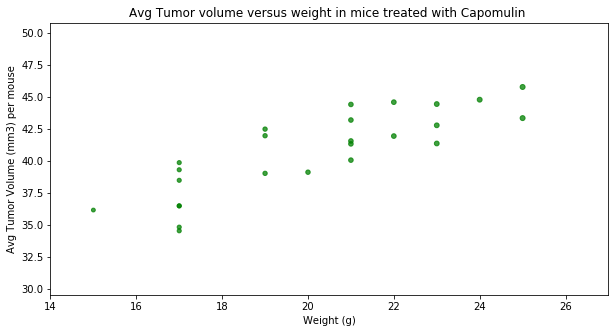

In [15]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomu_df=combined_df.loc[combined_df["Drug Regimen"]=="Capomulin"]
capomuGby_df=Capomu_df.groupby(['Mouse ID'])
plt.figure(figsize=(10, 5))
plt.scatter(capomuGby_df["Weight (g)"].mean(), capomuGby_df['Tumor Volume (mm3)'].mean(), marker="o", facecolors="green", edgecolors="green",
          s=capomuGby_df["Weight (g)"].mean(), alpha=0.75)
plt.ylabel('Avg Tumor Volume (mm3) per mouse')
plt.xlabel('Weight (g)')
plt.ylim(min(capomuGby_df['Tumor Volume (mm3)'].mean())-5, max(capomuGby_df['Tumor Volume (mm3)'].mean())+5)
plt.xlim(14, max(Capomu_df["Weight (g)"])+2)
plt.title("Avg Tumor volume versus weight in mice treated with Capomulin ")


In [16]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(capomuGby_df["Weight (g)"].mean(),capomuGby_df['Tumor Volume (mm3)'].mean())
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {round(correlation[0],2)}")



The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84


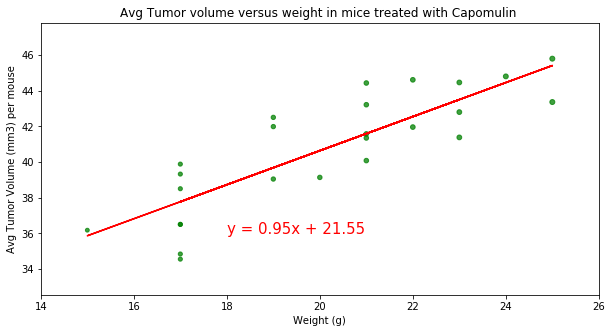

 The R-squared : 0.84


<Figure size 432x288 with 0 Axes>

In [20]:
# Calculate linear regression model and Add the linear regression equation and line to plot
x_values = capomuGby_df["Weight (g)"].mean()
y_values = capomuGby_df['Tumor Volume (mm3)'].mean()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10, 5))
plt.scatter(x_values,y_values,marker="o", facecolors="green", edgecolors="green",
          s=x_values, alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(""+line_eq,(18,36),fontsize=15,color="red")
plt.ylabel('Avg Tumor Volume (mm3) per mouse')
plt.xlabel('Weight (g)')
plt.ylim(min(y_values)-2, max(y_values)+2)
plt.xlim(14, max(x_values)+1)
plt.title("Avg Tumor volume versus weight in mice treated with Capomulin ")
plt.show()
plt.tight_layout()
print(f" The R-squared : {round(rvalue,2)}")